In [1]:
import pandas_datareader

In [2]:
googl = pandas_datareader.get_data_yahoo('GOOGL')

In [4]:
googl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,313.013000,310.300293,312.687683,310.300293,2437100.0,310.300293
2010-01-04,315.070068,312.432434,313.788788,313.688690,3908400.0,313.688690
2010-01-05,314.234222,311.081085,313.903900,312.307312,6003300.0,312.307312
2010-01-06,313.243256,303.483490,313.243256,304.434448,7949400.0,304.434448
2010-01-07,305.305298,296.621613,305.005005,297.347351,12815700.0,297.347351


Populating the interactive namespace from numpy and matplotlib


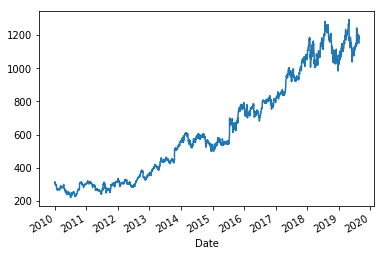

In [7]:
%pylab inline
googl['Close'].plot(kind='line')

In [8]:
googl.count()

High         2428
Low          2428
Open         2428
Close        2428
Volume       2428
Adj Close    2428
dtype: int64

In [21]:
googl.to_csv(r'D:\PythonCodes\Qiuyouwei_DL_Course\data\google_stock_price.csv')

# 读取数据

In [22]:
import pandas as pd
googl = pd.read_csv('D:/PythonCodes/Qiuyouwei_DL_Course/data/google_stock_price.csv')
googl.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009/12/31,313.013000,310.300293,312.687683,310.300293,2437100,310.300293
1,2010/1/4,315.070068,312.432434,313.788788,313.688690,3908400,313.688690
2,2010/1/5,314.234222,311.081085,313.903900,312.307312,6003300,312.307312
3,2010/1/6,313.243256,303.483490,313.243256,304.434448,7949400,304.434448
4,2010/1/7,305.305298,296.621613,305.005005,297.347351,12815700,297.347351


In [27]:
googl.count()

Date         2428
High         2428
Low          2428
Open         2428
Close        2428
Volume       2428
Adj Close    2428
dtype: int64

In [175]:
training_set = googl.iloc[0:2428 - 300, 4:5].values
# 如果不打4:5 那么取出来就不是dataframe的格式
# 因为不是分类预测，是和时间有关的预测，所以不能用sklearn.model_selection里的train_test_split


In [176]:
type(training_set[0:3])

numpy.ndarray

In [177]:
training_set.shape

(2128, 1)

In [178]:
test_set = googl.iloc[2428 - 300: , 4: 5].values

# 标准化

In [179]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [180]:
training_set_scaled

array([[0.09496172],
       [0.09845741],
       [0.09703229],
       ...,
       [0.95938322],
       [0.95529787],
       [0.97168072]])

# 用前60天的股价去预测后一天的股价

In [181]:
import numpy as np
x_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    x_train.append(training_set_scaled[i - 60: i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [182]:
x_train.shape

(2068, 60)

In [183]:
y_train

array([0.06745583, 0.06766752, 0.068535  , ..., 0.95938322, 0.95529787,
       0.97168072])

In [184]:
# 因为放到LSTM里面的模型里面，必须要在后面多一个维度
# 另外，如果以后想要将更多的特征放到模型中，就可以将新特征放到新的维度之中
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [185]:
x_train.shape

(2068, 60, 1)

# 构建LSTM模型

In [186]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [187]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))
regressor.compile(optimizer='adam', loss='mean_squared_error')

# 模型训练

In [188]:
regressor.fit(x_train, y_train, epochs=10, batch_size=100)

Epoch 1/10
2068/2068 [==============================] - 7s 3ms/step - loss: 0.0621
Epoch 2/10
2068/2068 [==============================] - 4s 2ms/step - loss: 0.0064
Epoch 3/10
2068/2068 [==============================] - 4s 2ms/step - loss: 0.0031
Epoch 4/10
2068/2068 [==============================] - 4s 2ms/step - loss: 0.0027
Epoch 5/10
2068/2068 [==============================] - 4s 2ms/step - loss: 0.0025
Epoch 6/10
2068/2068 [==============================] - 4s 2ms/step - loss: 0.0023
Epoch 7/10
2068/2068 [==============================] - 4s 2ms/step - loss: 0.0024
Epoch 8/10
2068/2068 [==============================] - 4s 2ms/step - loss: 0.0022
Epoch 9/10
2068/2068 [==============================] - 4s 2ms/step - loss: 0.0022
Epoch 10/10
2068/2068 [==============================] - 4s 2ms/step - loss: 0.0022


# 评估模型

In [189]:
test_set.shape

(300, 1)

In [190]:
test_set = sc.fit_transform(test_set)

In [191]:
test_set[:5]

array([[0.56045984],
       [0.63849386],
       [0.62279709],
       [0.64006671],
       [0.59310492]])

In [192]:
x_test = []
for i in range(60, len(test_set)):
    x_test.append(test_set[i - 60: i, 0])

In [193]:
x_test = np.array(x_test)

In [194]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [195]:
predicted_stock_price = regressor.predict(x_test)

In [196]:
predicted_stock_price[:5]

array([[0.8098205 ],
       [0.8043837 ],
       [0.7973674 ],
       [0.7889543 ],
       [0.77938944]], dtype=float32)

In [197]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [198]:
predicted_stock_price[:5]

array([[1236.9534],
       [1235.2596],
       [1233.0739],
       [1230.4529],
       [1227.4731]], dtype=float32)

In [199]:
# 因为预测数据是从60笔之后进行的 所以需要把之前60笔去掉，才能与真实数据进行对比
real_stock_price = sc.inverse_transform(test_set[60:])

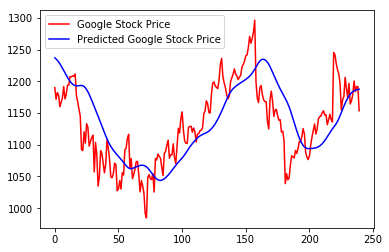

In [200]:
import matplotlib.pyplot as plt
plt.plot(real_stock_price, color='red', label='Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.legend()
plt.show()

#  评估模型在训练数据集上的表现

In [201]:
predicted_stock_price2 = regressor.predict(x_train)
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)
real_stock_price2 = training_set[60:]

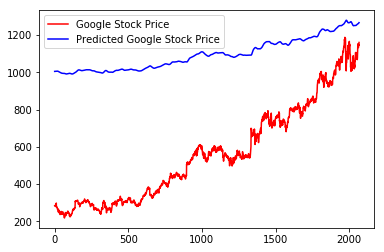

In [202]:
plt.plot(real_stock_price2, color='red', label='Google Stock Price')
plt.plot(predicted_stock_price2, color='blue', label='Predicted Google Stock Price')
plt.legend()
plt.show()